In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# SMOTE and Near Miss
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler


from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer
# from aif360.algorithms.preprocessing import Reweighing

plt.style.use("fivethirtyeight")

from IPython.display import display, HTML

import warnings
print('Ok')

Ok


In [2]:

data = pd.read_csv("""..\data\interim\data_100000-15percent.csv""")
data2 = data.drop(['customer'], axis=1)
# data2 = data2.drop(['tenure'], axis=1)
# data2 = data2.drop(['comeback_product'], axis=1)

data2['gender'] = data2['gender'].astype(int)
# data2['churn'] = data2['churn'].astype(object)
data2['is_senior'] = data2['is_senior'].astype(int)
data2['contract_period'] = data2['contract_period'].astype(object)

numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

data2 = pd.get_dummies(data2)

X_original = data2.drop('churn', axis=1)
y_original = data2['churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)
print(len(data2.keys()))
data2.keys()

Numerical: Index(['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage'],
      dtype='object')

Categorical: Index(['contract_period', 'race', 't_location'], dtype='object')
46


Index(['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 'contract_period_1', 'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36'],
      dtype='object')

In [3]:
models = []
models.append(('Random Forest', RandomForestClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression(max_iter=1000)))

models.append(('XGBClassifier', XGBClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

methods = ['original', 'adasyn', 'smote', 'rus', 'ros']

In [4]:
# AIF360 Dataset Preparation

all_labels = ['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 
        # 'contract_period_1', 
        'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36']

features = ['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 
        # 'contract_period_1', 
        'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36']


class TMDataset(StandardDataset):
    def __init__(self, 
             label_name='churn',
             favorable_classes=[1.0],
                 
             protected_attribute_names=[
                'gender', 
#                 'is_senior',
#                 'race_O',
             ],
    
             privileged_classes=[
                [1.0,], 
#                 [0.0,],
#                 [0.0,],
             ],
                 
             instance_weights_name=None,
             categorical_features=[],
             features_to_keep=features, 
             features_to_drop=[],
             custom_preprocessing=None,
             metadata=None,
             csv_file_name='',
             data_frame=None,
    ):
        
        if data_frame is not None:
            aif_df = data_frame
        else:
            aif_df = pd.read_csv(csv_file_name)
        
        #df.reset_index(drop=True, inplace=True)
        # Preprocessing
        
        super().__init__(
            df=aif_df, label_name=label_name,
            favorable_classes=favorable_classes,
            protected_attribute_names=protected_attribute_names,
            privileged_classes=privileged_classes,
            instance_weights_name=instance_weights_name,
            categorical_features=categorical_features,
            features_to_keep=features_to_keep,
            features_to_drop=features_to_drop,
            custom_preprocessing=custom_preprocessing, 
            metadata=metadata,
     
        )

In [5]:
def make_sampling(method_name, X, y):
    if method_name == 'original':
        return (X, y)
    elif method_name == 'adasyn':
        adasyn = ADASYN(sampling_strategy='minority', random_state=420, n_neighbors=5)
        return adasyn.fit_sample(X, y)
    elif method_name == 'smote':
        os = SMOTE(random_state=41)
        return os.fit_sample(X, y)
    elif method_name == 'ros':
        random_over_sampler = RandomOverSampler(random_state=42)
        return random_over_sampler.fit_resample(X, y)
    elif method_name == 'rus':
        random_under_sampler = RandomUnderSampler(random_state=42)
        return random_under_sampler.fit_resample(X, y)
    else:
        print('UNKNOWN METHOD !!') 


Charn values Original
0    85000
1    15000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    56927
1    10073
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    28073
1     4927
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.89528
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     30653
           1       0.39      0.83      0.53      2347

    accuracy                           0.90     33000
   macro avg       0.69      0.87      0.74     33000
weighted avg       0.94      0.90      0.91     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20139
0    12861
Name: gender, dtype: int64


              counter
churn gender         
0     0         12022
      1         18631
1     0           839
      1          1508
# # # # # # # # # # 
[[27669   404]
 [ 2984  1943]]


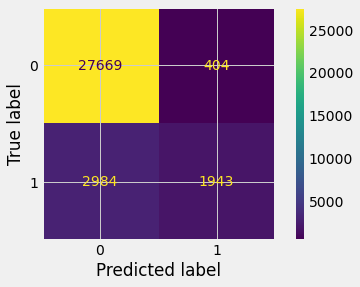




ROC AUC Score 0.8295274799339261
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.009643602111117339

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8712118680929761

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 2347.0, 'FP': 0.0, 'TN': 30653.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.009644,2347.0,30653.0,[0.9788363636363635],0.871212,[0.9788363636363635],-0.009644


Charn values Original
1    86058
0    85000
Name: churn, dtype: int64
Total data: 171058

Charn values Train
1    57615
0    56993
Name: churn, dtype: int64
Total data: 114608

Charn values Test
1    28443
0    28007
Name: churn, dtype: int64
Total data: 56450


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9230793197482159
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     30107
           1       0.89      0.97      0.93     26343

    accuracy                           0.93     56450
   macro avg       0.93      0.93      0.93     56450
weighted avg       0.93      0.93      0.93     56450


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30183
0    26267
Name: gender, dtype: int64


              counter
churn gender         
0     0         11849
      1         18258
1     0         14418
      1         11925
# # # # # # # # # # 
[[27100   907]
 [ 3007 25436]]


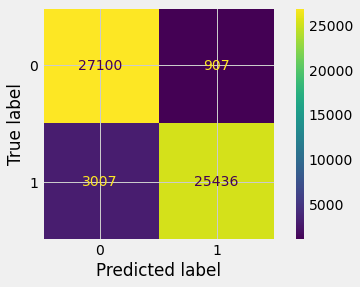




ROC AUC Score 0.9697900554620111
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.15381171238738328

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3893080851143305

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 26343.0, 'FP': 0.0, 'TN': 30107.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.153812,26343.0,30107.0,[0.7269902568644446],1.389308,[0.7269902568644446],0.153812


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9281647058823529
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     30222
           1       0.89      0.97      0.93     25878

    accuracy                           0.93     56100
   macro avg       0.93      0.93      0.93     56100
weighted avg       0.93      0.93      0.93     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30404
0    25696
Name: gender, dtype: int64


              counter
churn gender         
0     0         11853
      1         18369
1     0         13843
      1         12035
# # # # # # # # # # 
[[27131   820]
 [ 3091 25058]]


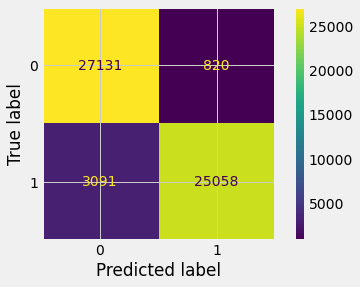




ROC AUC Score 0.9689163066318692
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.14288590587395678

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3609724206224996

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 25878.0, 'FP': 0.0, 'TN': 30222.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.142886,25878.0,30222.0,[0.7772121212121073],1.360972,[0.7772121212121073],0.142886


Charn values Original
1    15000
0    15000
Name: churn, dtype: int64
Total data: 30000

Charn values Train
1    10096
0    10004
Name: churn, dtype: int64
Total data: 20100

Charn values Test
0    4996
1    4904
Name: churn, dtype: int64
Total data: 9900


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7435333333333334
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      5540
           1       0.70      0.79      0.74      4360

    accuracy                           0.76      9900
   macro avg       0.76      0.76      0.76      9900
weighted avg       0.76      0.76      0.76      9900


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    6224
0    3676
Name: gender, dtype: int64


              counter
churn gender         
0     0          2172
      1          3368
1     0          1504
      1          2856
# # # # # # # # # # 
[[4062  934]
 [1478 3426]]


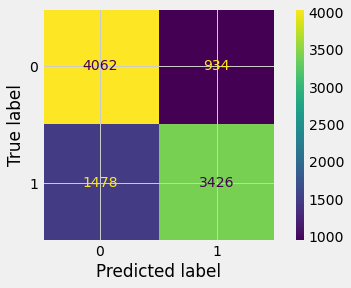




ROC AUC Score 0.8326377251883073
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.04972852463418659

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8916280331501479

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 4360.0, 'FP': 0.0, 'TN': 5540.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.049729,4360.0,5540.0,[0.7610909090909054],0.891628,[0.7610909090909054],-0.049729


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9825294117647058
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26906
           1       0.99      0.95      0.97     29194

    accuracy                           0.97     56100
   macro avg       0.97      0.97      0.97     56100
weighted avg       0.97      0.97      0.97     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    35231
0    20869
Name: gender, dtype: int64


              counter
churn gender         
0     0         10772
      1         16134
1     0         10097
      1         19097
# # # # # # # # # # 
[[26580  1371]
 [  326 27823]]


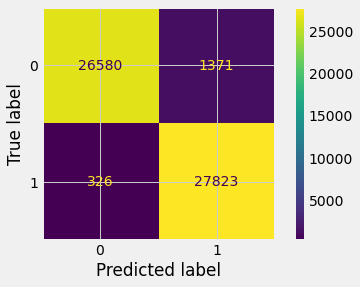




ROC AUC Score 0.9942596899974538
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.05822334760035386

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8925869634336249

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 29194.0, 'FP': 0.0, 'TN': 26906.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.058223,29194.0,26906.0,[0.7814117647058726],0.892587,[0.7814117647058726],-0.058223


Charn values Original
0    85000
1    15000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    56927
1    10073
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    28073
1     4927
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8974400000000001
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     30594
           1       0.40      0.83      0.54      2406

    accuracy                           0.90     33000
   macro avg       0.69      0.86      0.74     33000
weighted avg       0.94      0.90      0.91     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20139
0    12861
Name: gender, dtype: int64


              counter
churn gender         
0     0         12010
      1         18584
1     0           851
      1          1555
# # # # # # # # # # 
[[27654   419]
 [ 2940  1987]]


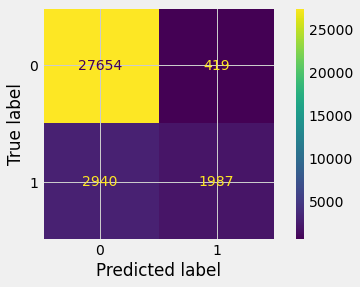




ROC AUC Score 0.8444163098482167
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.011044328921228627

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.856963511161014

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 2406.0, 'FP': 0.0, 'TN': 30594.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.011044,2406.0,30594.0,[0.9793333333333333],0.856964,[0.9793333333333333],-0.011044


Charn values Original
1    86058
0    85000
Name: churn, dtype: int64
Total data: 171058

Charn values Train
1    57615
0    56993
Name: churn, dtype: int64
Total data: 114608

Charn values Test
1    28443
0    28007
Name: churn, dtype: int64
Total data: 56450


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9245175353649732
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     30667
           1       0.89      0.98      0.93     25783

    accuracy                           0.94     56450
   macro avg       0.94      0.94      0.94     56450
weighted avg       0.94      0.94      0.94     56450


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30183
0    26267
Name: gender, dtype: int64


              counter
churn gender         
0     0         12128
      1         18539
1     0         14139
      1         11644
# # # # # # # # # # 
[[27509   498]
 [ 3158 25285]]


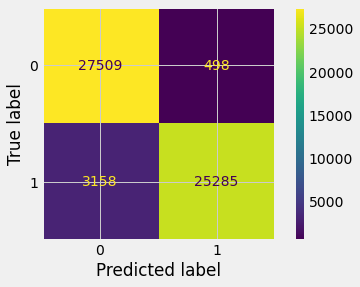




ROC AUC Score 0.9704006958165231
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.1524998961897709

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3953026766313856

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 25783.0, 'FP': 0.0, 'TN': 30667.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.1525,25783.0,30667.0,[0.726444641275427],1.395303,[0.726444641275427],0.1525


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9296588235294119
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     30598
           1       0.89      0.98      0.93     25502

    accuracy                           0.94     56100
   macro avg       0.94      0.94      0.94     56100
weighted avg       0.94      0.94      0.94     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30404
0    25696
Name: gender, dtype: int64


              counter
churn gender         
0     0         12015
      1         18583
1     0         13681
      1         11821
# # # # # # # # # # 
[[27470   481]
 [ 3128 25021]]


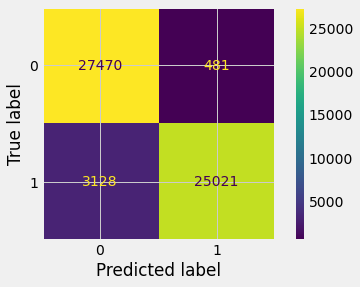




ROC AUC Score 0.9706513430674323
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.14361997024544354

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.369395277501266

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 25502.0, 'FP': 0.0, 'TN': 30598.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.14362,25502.0,30598.0,[0.7786488413547098],1.369395,[0.7786488413547098],0.14362


Charn values Original
1    15000
0    15000
Name: churn, dtype: int64
Total data: 30000

Charn values Train
1    10096
0    10004
Name: churn, dtype: int64
Total data: 20100

Charn values Test
0    4996
1    4904
Name: churn, dtype: int64
Total data: 9900


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7516333333333334
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      5497
           1       0.71      0.79      0.75      4403

    accuracy                           0.76      9900
   macro avg       0.76      0.76      0.76      9900
weighted avg       0.77      0.76      0.76      9900


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    6224
0    3676
Name: gender, dtype: int64


              counter
churn gender         
0     0          2179
      1          3318
1     0          1497
      1          2906
# # # # # # # # # # 
[[4068  928]
 [1429 3475]]


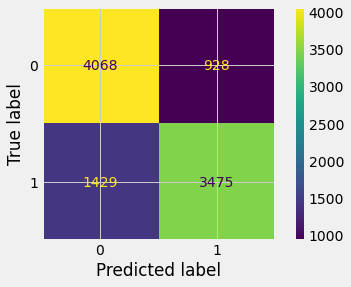




ROC AUC Score 0.8410451240274438
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.059666187400521986

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8722084134959226

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 4403.0, 'FP': 0.0, 'TN': 5497.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.059666,4403.0,5497.0,[0.7597777777777748],0.872208,[0.7597777777777748],-0.059666


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7753235294117646
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     30670
           1       0.73      0.81      0.77     25430

    accuracy                           0.78     56100
   macro avg       0.78      0.78      0.78     56100
weighted avg       0.78      0.78      0.78     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    35231
0    20869
Name: gender, dtype: int64


              counter
churn gender         
0     0         12331
      1         18339
1     0          8538
      1         16892
# # # # # # # # # # 
[[23080  4871]
 [ 7590 20559]]


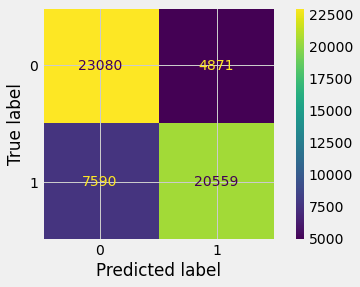




ROC AUC Score 0.865182434159827
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.07034052788339767

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.853293444360645

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 25430.0, 'FP': 0.0, 'TN': 30670.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.070341,25430.0,30670.0,[0.8195115864527641],0.853293,[0.8195115864527641],-0.070341


Charn values Original
0    85000
1    15000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    56927
1    10073
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    28073
1     4927
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8964300000000002
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     30723
           1       0.39      0.84      0.53      2277

    accuracy                           0.90     33000
   macro avg       0.69      0.87      0.74     33000
weighted avg       0.95      0.90      0.91     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20139
0    12861
Name: gender, dtype: int64


              counter
churn gender         
0     0         12022
      1         18701
1     0           839
      1          1438
# # # # # # # # # # 
[[27701   372]
 [ 3022  1905]]


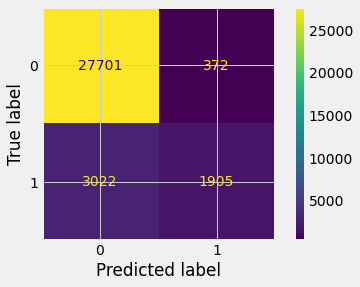




ROC AUC Score 0.8386931550221811
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.006167759219216043

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9136213470682949

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 2277.0, 'FP': 0.0, 'TN': 30723.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.006168,2277.0,30723.0,[0.9851939393939395],0.913621,[0.9851939393939395],-0.006168


Charn values Original
1    86058
0    85000
Name: churn, dtype: int64
Total data: 171058

Charn values Train
1    57615
0    56993
Name: churn, dtype: int64
Total data: 114608

Charn values Test
1    28443
0    28007
Name: churn, dtype: int64
Total data: 56450


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.904547574176226
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     30428
           1       0.87      0.95      0.91     26022

    accuracy                           0.91     56450
   macro avg       0.91      0.91      0.91     56450
weighted avg       0.91      0.91      0.91     56450


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30183
0    26267
Name: gender, dtype: int64


              counter
churn gender         
0     0         12031
      1         18397
1     0         14236
      1         11786
# # # # # # # # # # 
[[26707  1300]
 [ 3721 24722]]


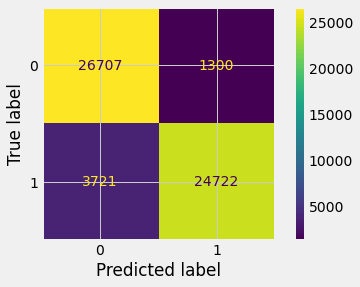




ROC AUC Score 0.9568285813137952
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.1514881076677808

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3879488845865118

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 26022.0, 'FP': 0.0, 'TN': 30428.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.151488,26022.0,30428.0,[0.7246731620903084],1.387949,[0.7246731620903084],0.151488


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9024117647058822
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     31555
           1       0.84      0.96      0.90     24545

    accuracy                           0.90     56100
   macro avg       0.90      0.91      0.90     56100
weighted avg       0.91      0.90      0.90     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30404
0    25696
Name: gender, dtype: int64


              counter
churn gender         
0     0         12543
      1         19012
1     0         13153
      1         11392
# # # # # # # # # # 
[[27071   880]
 [ 4484 23665]]


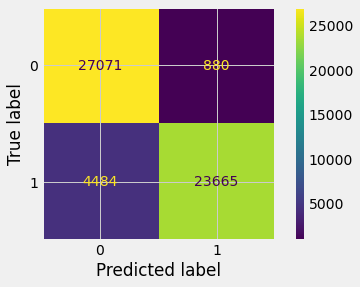




ROC AUC Score 0.9562173224995825
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.13718201056818408

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.366123757840157

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 24545.0, 'FP': 0.0, 'TN': 31555.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.137182,24545.0,31555.0,[0.7887771836007036],1.366124,[0.7887771836007036],0.137182


Charn values Original
1    15000
0    15000
Name: churn, dtype: int64
Total data: 30000

Charn values Train
1    10096
0    10004
Name: churn, dtype: int64
Total data: 20100

Charn values Test
0    4996
1    4904
Name: churn, dtype: int64
Total data: 9900


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7460666666666668
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      5599
           1       0.69      0.79      0.74      4301

    accuracy                           0.76      9900
   macro avg       0.76      0.76      0.76      9900
weighted avg       0.77      0.76      0.76      9900


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    6224
0    3676
Name: gender, dtype: int64


              counter
churn gender         
0     0          2208
      1          3391
1     0          1468
      1          2833
# # # # # # # # # # 
[[4099  897]
 [1500 3404]]


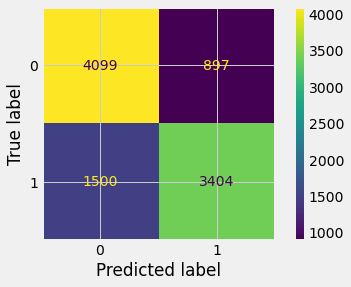




ROC AUC Score 0.8353229484076657
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.055826405419996616

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8773513775735761

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 4301.0, 'FP': 0.0, 'TN': 5599.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.055826,4301.0,5599.0,[0.7685050505050453],0.877351,[0.7685050505050453],-0.055826


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7563705882352941
              precision    recall  f1-score   support

           0       0.82      0.73      0.77     31646
           1       0.69      0.80      0.74     24454

    accuracy                           0.76     56100
   macro avg       0.76      0.76      0.76     56100
weighted avg       0.77      0.76      0.76     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    35231
0    20869
Name: gender, dtype: int64


              counter
churn gender         
0     0         12526
      1         19120
1     0          8343
      1         16111
# # # # # # # # # # 
[[23019  4932]
 [ 8627 19522]]


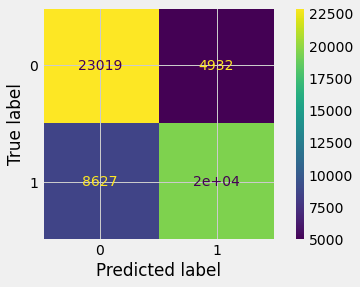




ROC AUC Score 0.8392697572553351
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.057516553884495

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8742247092108097

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 24454.0, 'FP': 0.0, 'TN': 31646.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.057517,24454.0,31646.0,[0.828987522281647],0.874225,[0.828987522281647],-0.057517


Charn values Original
0    85000
1    15000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    56927
1    10073
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    28073
1     4927
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8602000000000001
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     32200
           1       0.12      0.73      0.20       800

    accuracy                           0.86     33000
   macro avg       0.56      0.80      0.56     33000
weighted avg       0.97      0.86      0.91     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20139
0    12861
Name: gender, dtype: int64


              counter
churn gender         
0     0         12611
      1         19589
1     0           250
      1           550
# # # # # # # # # # 
[[27859   214]
 [ 4341   586]]


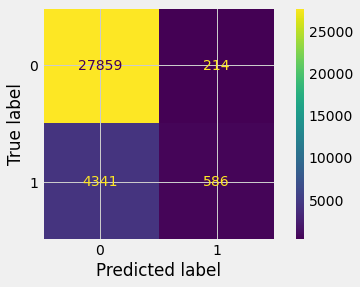




ROC AUC Score 0.7447537054568459
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.007871581290066692

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.7117713170897216

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 800.0, 'FP': 0.0, 'TN': 32200.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.007872,800.0,32200.0,[0.9820787878787879],0.711771,[0.9820787878787879],-0.007872


Charn values Original
1    86058
0    85000
Name: churn, dtype: int64
Total data: 171058

Charn values Train
1    57615
0    56993
Name: churn, dtype: int64
Total data: 114608

Charn values Test
1    28443
0    28007
Name: churn, dtype: int64
Total data: 56450


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6123297411367599
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     29465
           1       0.71      0.75      0.73     26985

    accuracy                           0.74     56450
   macro avg       0.74      0.74      0.74     56450
weighted avg       0.74      0.74      0.74     56450


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30183
0    26267
Name: gender, dtype: int64


              counter
churn gender         
0     0          7660
      1         21805
1     0         18607
      1          8378
# # # # # # # # # # 
[[21285  6722]
 [ 8180 20263]]


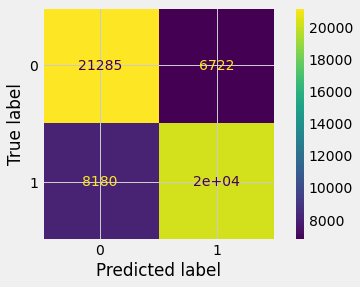




ROC AUC Score 0.8159314032095388
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.43080586677886

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  2.5520426685350124

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 26985.0, 'FP': 0.0, 'TN': 29465.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.430806,26985.0,29465.0,[0.6848715677590139],2.552043,[0.6848715677590139],0.430806


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6851
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     29728
           1       0.71      0.76      0.73     26372

    accuracy                           0.74     56100
   macro avg       0.74      0.74      0.74     56100
weighted avg       0.74      0.74      0.74     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30404
0    25696
Name: gender, dtype: int64


              counter
churn gender         
0     0          8245
      1         21483
1     0         17451
      1          8921
# # # # # # # # # # 
[[21578  6373]
 [ 8150 19999]]


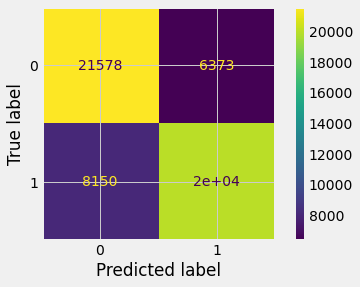




ROC AUC Score 0.8199525584311504
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.38571759889199875

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  2.3145788450523854

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 26372.0, 'FP': 0.0, 'TN': 29728.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.385718,26372.0,29728.0,[0.7250374331550464],2.314579,[0.7250374331550464],0.385718


Charn values Original
1    15000
0    15000
Name: churn, dtype: int64
Total data: 30000

Charn values Train
1    10096
0    10004
Name: churn, dtype: int64
Total data: 20100

Charn values Test
0    4996
1    4904
Name: churn, dtype: int64
Total data: 9900


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6575333333333332
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      5058
           1       0.63      0.64      0.64      4842

    accuracy                           0.64      9900
   macro avg       0.64      0.64      0.64      9900
weighted avg       0.64      0.64      0.64      9900


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    6224
0    3676
Name: gender, dtype: int64


              counter
churn gender         
0     0          1835
      1          3223
1     0          1841
      1          3001
# # # # # # # # # # 
[[3253 1743]
 [1805 3099]]


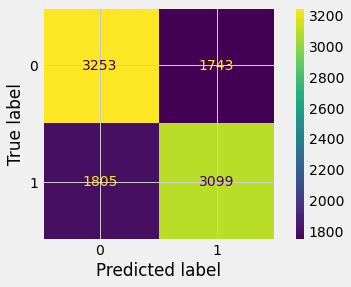




ROC AUC Score 0.6927466116449441
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.018650294692733493

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.0386802513054225

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 4842.0, 'FP': 0.0, 'TN': 5058.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.01865,4842.0,5058.0,[0.7978383838383761],1.03868,[0.7978383838383761],0.01865


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6684882352941176
              precision    recall  f1-score   support

           0       0.73      0.66      0.70     30611
           1       0.64      0.70      0.67     25489

    accuracy                           0.68     56100
   macro avg       0.68      0.68      0.68     56100
weighted avg       0.69      0.68      0.68     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    35231
0    20869
Name: gender, dtype: int64


              counter
churn gender         
0     0         12703
      1         17908
1     0          8166
      1         17323
# # # # # # # # # # 
[[20352  7599]
 [10259 17890]]


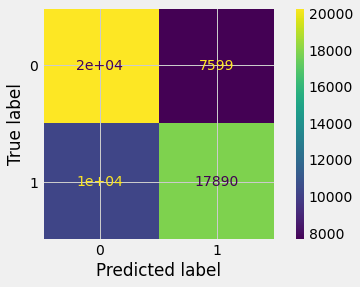




ROC AUC Score 0.743189531045712
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.10039955497865155

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.7958103837988297

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 25489.0, 'FP': 0.0, 'TN': 30611.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.1004,25489.0,30611.0,[0.7734367201425858],0.79581,[0.7734367201425858],-0.1004


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

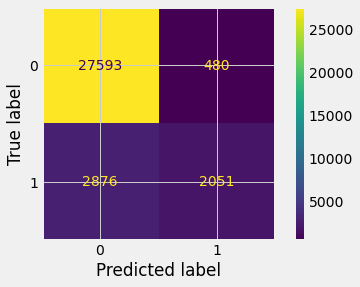




ROC AUC Score 0.8389918775002726
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.011008133083189403

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.864075541286112

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 2531.0, 'FP': 0.0, 'TN': 30469.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.011008,2531.0,30469.0,[0.9728060606060601],0.864076,[0.9728060606060601],-0.011008


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

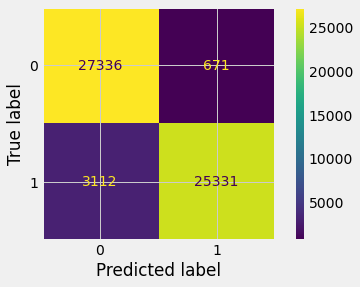




ROC AUC Score 0.9695272715238902
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.15150991598298008

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3883672011986656

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 26002.0, 'FP': 0.0, 'TN': 30448.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.15151,26002.0,30448.0,[0.7260513728963305],1.388367,[0.7260513728963305],0.15151


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:55:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

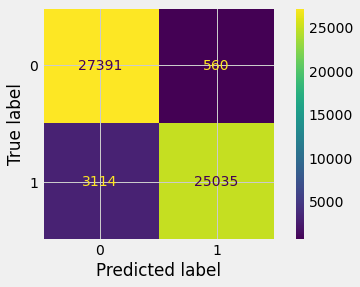




ROC AUC Score 0.9694537073989803
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.14372066896388908

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3681283251203102

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 25595.0, 'FP': 0.0, 'TN': 30505.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.143721,25595.0,30505.0,[0.7777718360071157],1.368128,[0.7777718360071157],0.143721


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:57:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

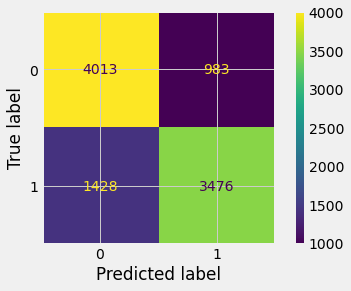




ROC AUC Score 0.8331623496186836
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.05914414628620018

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.874791439970983

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 4459.0, 'FP': 0.0, 'TN': 5441.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.059144,4459.0,5441.0,[0.7551717171717145],0.874791,[0.7551717171717145],-0.059144


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:58:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:58:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:58:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

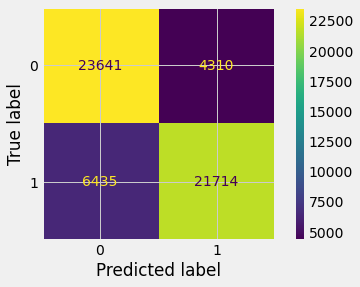




ROC AUC Score 0.8971892429825407
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.06934599788272805

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8583857609896597

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 26024.0, 'FP': 0.0, 'TN': 30076.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.069346,26024.0,30076.0,[0.8131479500891265],0.858386,[0.8131479500891265],-0.069346


Charn values Original
0    85000
1    15000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    56927
1    10073
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    28073
1     4927
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8244399999999998
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     27699
           1       0.47      0.44      0.45      5301

    accuracy                           0.83     33000
   macro avg       0.68      0.67      0.68     33000
weighted avg       0.83      0.83      0.83     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20139
0    12861
Name: gender, dtype: int64


              counter
churn gender         
0     0         10925
      1         16774
1     0          1936
      1          3365
# # # # # # # # # # 
[[25088  2985]
 [ 2611  2316]]


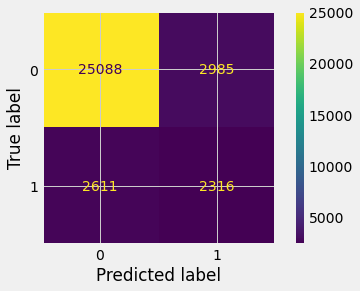




ROC AUC Score 0.681957187627713
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.01655611531116033

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9009142329118996

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 5301.0, 'FP': 0.0, 'TN': 27699.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.016556,5301.0,27699.0,[0.8454242424242611],0.900914,[0.8454242424242611],-0.016556


Charn values Original
1    86058
0    85000
Name: churn, dtype: int64
Total data: 171058

Charn values Train
1    57615
0    56993
Name: churn, dtype: int64
Total data: 114608

Charn values Test
1    28443
0    28007
Name: churn, dtype: int64
Total data: 56450


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8708338218019369
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     27482
           1       0.89      0.88      0.89     28968

    accuracy                           0.88     56450
   macro avg       0.88      0.88      0.88     56450
weighted avg       0.88      0.88      0.88     56450


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30183
0    26267
Name: gender, dtype: int64


              counter
churn gender         
0     0         10906
      1         16576
1     0         15361
      1         13607
# # # # # # # # # # 
[[24446  3561]
 [ 3036 25407]]


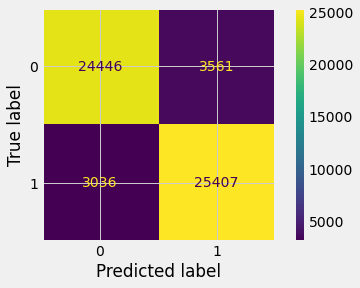




ROC AUC Score 0.883087397747903
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.13398553843319433

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.297206254613736

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 28968.0, 'FP': 0.0, 'TN': 27482.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.133986,28968.0,27482.0,[0.7038122232063273],1.297206,[0.7038122232063273],0.133986


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8780882352941177
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     27281
           1       0.90      0.87      0.88     28819

    accuracy                           0.88     56100
   macro avg       0.88      0.88      0.88     56100
weighted avg       0.88      0.88      0.88     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    30404
0    25696
Name: gender, dtype: int64


              counter
churn gender         
0     0         10799
      1         16482
1     0         14897
      1         13922
# # # # # # # # # # 
[[24335  3616]
 [ 2946 25203]]


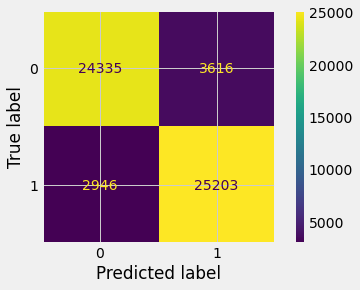




ROC AUC Score 0.8829952646777166
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.12183976108046352

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2660836155646038

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 28819.0, 'FP': 0.0, 'TN': 27281.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.12184,28819.0,27281.0,[0.7419108734402566],1.266084,[0.7419108734402566],0.12184


Charn values Original
1    15000
0    15000
Name: churn, dtype: int64
Total data: 30000

Charn values Train
1    10096
0    10004
Name: churn, dtype: int64
Total data: 20100

Charn values Test
0    4996
1    4904
Name: churn, dtype: int64
Total data: 9900


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.6688000000000001
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      4910
           1       0.68      0.67      0.67      4990

    accuracy                           0.67      9900
   macro avg       0.67      0.67      0.67      9900
weighted avg       0.67      0.67      0.67      9900


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    6224
0    3676
Name: gender, dtype: int64


              counter
churn gender         
0     0          1862
      1          3048
1     0          1814
      1          3176
# # # # # # # # # # 
[[3327 1669]
 [1583 3321]]


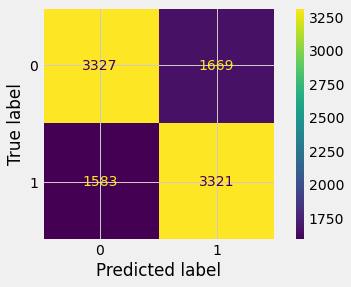




ROC AUC Score 0.6716354119184417
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.016811612040582846

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9670543219960367

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 4990.0, 'FP': 0.0, 'TN': 4910.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.016812,4990.0,4910.0,[0.6885252525252561],0.967054,[0.6885252525252561],-0.016812


Charn values Original
1    85000
0    85000
Name: churn, dtype: int64
Total data: 170000

Charn values Train
0    57049
1    56851
Name: churn, dtype: int64
Total data: 113900

Charn values Test
1    28149
0    27951
Name: churn, dtype: int64
Total data: 56100


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9421176470588236
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     24472
           1       0.99      0.88      0.93     31628

    accuracy                           0.93     56100
   macro avg       0.93      0.93      0.93     56100
weighted avg       0.94      0.93      0.93     56100


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    35231
0    20869
Name: gender, dtype: int64


              counter
churn gender         
0     0          9812
      1         14660
1     0         11057
      1         20571
# # # # # # # # # # 
[[24196  3755]
 [  276 27873]]


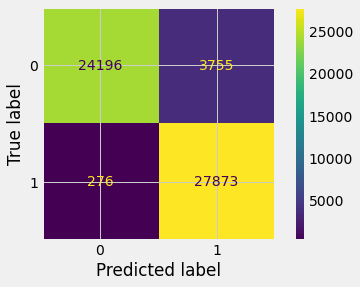




ROC AUC Score 0.9279807424852577
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.054060255631833476

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.907413501231582

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 31628.0, 'FP': 0.0, 'TN': 24472.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.05406,31628.0,24472.0,[0.7583814616755584],0.907414,[0.7583814616755584],-0.05406


In [6]:
for name, model in models:
    display(HTML(f'<h2> {name} </h2>'))
    for method in methods:
        display(HTML(f'<h3>{method} </h3>'))
        X, y = make_sampling(method, X_original, y_original)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)
        score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
        
        print('Charn values Original')
        print(y.value_counts())
        print('Total data: {}'.format(y.count()))
        
        print('\nCharn values Train')
        print(y_train.value_counts())
        print('Total data: {}'.format(y_train.count()))
        
        print('\nCharn values Test')
        print(y_test.value_counts())
        print('Total data: {}'.format(y_test.count()))
        
        print("\n")
        print("*_" * 20)
        print(f"Mean scores : {score.mean()}")

        model.fit(X_train, y_train)

        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        print(metrics.classification_report(y_pred_test, y_test))
        
        pred_df = X_test.copy()
        pred_df['churn'] = y_pred_test
        
        print('\n Gender Count in predited value with X_test set')
        print('# ' * 10)
        print(pred_df.gender.value_counts())
        p_df = pred_df[['churn', 'gender']]
        print('\n')
        p_df.insert(2, 'counter', 1)
        print(p_df.groupby(['churn','gender',]).sum())
        print('# ' * 10)
        
        print(metrics.confusion_matrix(y_test, y_pred_test))
        metrics.plot_confusion_matrix(model, X_test, y_test)
        plt.show()

        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc_score = metrics.roc_auc_score(y_test, y_proba)
        print('\n\n')
        print(f'ROC AUC Score {roc_auc_score}')
        

        # Additional matrix
        df_pred = X_test
        df_pred.reset_index(drop=True, inplace=True)
        
        pred = pd.Series(y_pred_test)
        df_pred = df_pred.assign(churn=pred)
        
        # df_pred = df_pred.assign(churn=y_test)
        
        aif_df = TMDataset(data_frame=df_pred)
        aif_df_labeled = aif_df.copy()
        aif_df_labeled.labels = y_pred_test
        
        result_tbl_cols = [
            'Attribute',
            'Mean difference', 
            'Positive Outcome',
            'Negative', 
            'Differences', 
            'Disparate impact', 
            'Consistency',
            'Statistical parity dif',
        ]

        result_rows = []
        for p_attribute in aif_df.protected_attribute_names:
            result_row = []
            privileged_groups = [{p_attribute: 1}]
            print(' * ' * 10)
            print(privileged_groups)
            unprivileged_groups = [{p_attribute: 0}]
            
            metric_orig_train = BinaryLabelDatasetMetric(
                aif_df,  unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
            
            clsf_metric = ClassificationMetric(
                aif_df, aif_df_labeled, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
            
            print('\n AIF 360 ')
            print('\n Statistical parity difference', clsf_metric.statistical_parity_difference())
           
            print('\n True possitve rate {} \t True negative rate {} '.format(
                clsf_metric.true_positive_rate(), clsf_metric.true_negative_rate()))
            
            print('\n Desparate impact ', clsf_metric.disparate_impact())
            print('\n Equal opportunity difference ', clsf_metric.equal_opportunity_difference())
            print('\n Average odds difference ', clsf_metric.average_odds_difference())
            print('\n Theil Index ', clsf_metric.theil_index())
            print('\n Binary Confusion Matric ')
            print(clsf_metric.binary_confusion_matrix())
            print('\n ..........................')

            text_expl = MetricTextExplainer(metric_orig_train)
            
            result_row.append(p_attribute)
            result_row.append(metric_orig_train.mean_difference())
            result_row.append(metric_orig_train.num_positives())
            result_row.append(metric_orig_train.num_negatives())

            # this is to shutup the warning msg from sklearn
            with warnings.catch_warnings():
                warnings.simplefilter('ignore', FutureWarning)
                result_row.append(metric_orig_train.consistency())
                
            result_row.append(metric_orig_train.disparate_impact())
            result_row.append(metric_orig_train.consistency())
            result_row.append(metric_orig_train.statistical_parity_difference())

            result_rows.append(result_row)

        result_df = pd.DataFrame(result_rows, columns=result_tbl_cols)
        display(result_df)
        # End Aif matrix

In [7]:
# pred_df.group_by(['churn'])
print(pred_df.gender.value_counts())
p_df = pred_df[['churn', 'gender']]
p_df.insert(2, 'counter', 1)
p_df.groupby(['churn','gender',]).sum()

1    35231
0    20869
Name: gender, dtype: int64


counter
churn gender         
0     0          9812
      1         14660
1     0         11057
      1         20571